In [1]:
import numpy as np
all_selected_features = np.load('all_selected_features.npy', encoding = 'latin1')

In [2]:
tags = np.load('tags.npy', encoding = 'latin1')

In [3]:
all_selected_features

array([[4.0, 24.0, 10.491330295138889, ..., 0.04764792486751901,
        -0.20372739284305696, 0.007738569507839782],
       [4.18, 25.0, 7.1436875, ..., 0.05345539157154828,
        -0.09267610658280212, 0.5205620970512248],
       [3.12, 29.97002997002997, 18.564969618055557, ...,
        0.04755244724276521, 0.45511116341639024, 0.13341562334134907],
       ...,
       [3.68, 29.97002997002997, 50.58107638888889, ...,
        0.08872334474799293, 0.8049269913986392, 0.5518088927610451],
       [3.42, 29.97002997002997, 13.070269097222223, ...,
        0.04186467671244019, 1.011901183110088, 0.49866779137366257],
       [3.4, 29.97002997002997, 119.80957899305555, ...,
        0.050812777751733096, 0.8206719296310854, 0.6348684952344302]],
      dtype=object)

In [4]:
from sklearn.utils import shuffle
all_features, all_MOS = shuffle(all_selected_features[:,1:], all_selected_features[:,0]/5, random_state=1 )

In [5]:
def MSE(seq1, seq2, length):
    sum_square_error = 0
    for i in range(length):
        sum_square_error += (seq1[i]-seq2[i])**2
        
    mean_square_error =sum_square_error/length
    return mean_square_error

import math
def RMSE(seq1, seq2, length):
    return math.sqrt(MSE(seq1, seq2, length))

def MAE(seq1, seq2, length):
    sum_abs_error = 0
    for i in range(length):
        sum_abs_error += abs(seq1[i]-seq2[i])
        
    mean_abs_error = sum_abs_error/length
    return mean_abs_error



from sklearn.model_selection import KFold
import scipy as scy
sum_spearmanr_train = sum_pearsonr_train = sum_kendalltau_train =  sum_MSE_train = sum_RMSE_train = sum_MAE_train = 0
sum_spearmanr_test  = sum_pearsonr_test  = sum_kendalltau_test  =  sum_MSE_test  = sum_RMSE_test  = sum_MAE_test  = 0
num_folds = 4
k=0
kf = KFold(n_splits=num_folds,random_state=1)
for train, test in kf.split(all_selected_features):
    
    all_features_train, all_MOS_train = [all_selected_features[train,1:], all_selected_features[train,0]/5.0]
    all_features_test,  all_MOS_test  = [all_selected_features[test,1:],  all_selected_features[test,0]/5.0 ]
    
    train_num = all_features_train.shape[0]
    test_num  = all_features_test.shape[0]
    
    list_features_train = []
    list_features_test  = []
    
    list_MOS_train = []
    list_MOS_test  = []
    
    for i in range(train_num):
        list_features_train.append(all_features_train[i,:])
        list_MOS_train.append(all_MOS_train[i])
    
    for i in range(test_num):
        list_features_test.append(all_features_test[i,:])
        list_MOS_test.append(all_MOS_test[i])
    
    # redifine regr
    from sklearn.ensemble import ExtraTreesRegressor
    regr = ExtraTreesRegressor(n_estimators=100,random_state=1)

    regr = regr.fit(np.array(list_features_train), np.array(list_MOS_train))
    
    ##---------------------------------------
    k+=1
    print("------------- train ",k,"/",num_folds,"-------------")
    MOS_pred = regr.predict(np.array(list_features_train))
    
    spearmanr_train=scy.stats.spearmanr(list_MOS_train,MOS_pred)
    #print("Spearman Correlation result of train")
    print(spearmanr_train)
    
    pearsonr_train=scy.stats.pearsonr(list_MOS_train,MOS_pred)
    print("Pearson Correlation result of train")
    print(pearsonr_train)
    
    kendalltau_train=scy.stats.kendalltau(list_MOS_train,MOS_pred)
    #print("Kendall's  Correlation result of train")
    print(kendalltau_train)
    
    MSE_train=MSE(list_MOS_train,MOS_pred,len(list_MOS_train))
    print("MSE of train")
    print(MSE_train)
    
    RMSE_train=RMSE(list_MOS_train,MOS_pred,len(list_MOS_train))
    print("RMSE of train")
    print(RMSE_train)
    
    MAE_train=MAE(list_MOS_train,MOS_pred,len(list_MOS_train))
    print("MAE of train")
    print(MAE_train)
    
    
    ##---------------------------------------
    print("------------- test -------------")
    
    MOS_pred = regr.predict(np.array(list_features_test))
    
    spearmanr_test = scy.stats.spearmanr(list_MOS_test,MOS_pred)
    #print("Spearman Correlation result of test")
    print(spearmanr_test)
    
    pearsonr_test=scy.stats.pearsonr(list_MOS_test,MOS_pred)
    print("Pearson Correlation result of test")
    print(pearsonr_test)
    
    kendalltau_test=scy.stats.kendalltau(list_MOS_test,MOS_pred)
    #print("Kendall's  Correlation result of test")
    print(kendalltau_test)
    
    MSE_test=MSE(list_MOS_test,MOS_pred,len(list_MOS_test))
    print("MSE of test")
    print(MSE_test)
    
    RMSE_test=RMSE(list_MOS_test,MOS_pred,len(list_MOS_test))
    print("RMSE of test")
    print(RMSE_test)
    
    MAE_test=MAE(list_MOS_test,MOS_pred,len(list_MOS_test))
    print("MAE of test")
    print(MAE_test)
    
    

    sum_spearmanr_train += spearmanr_train[0]
    sum_pearsonr_train  += pearsonr_train[0]
    sum_kendalltau_train+= kendalltau_train[0]
    sum_MSE_train += MSE_train 
    sum_RMSE_train += RMSE_train 
    sum_MAE_train += MAE_train 
    
    sum_spearmanr_test += spearmanr_test[0]
    sum_pearsonr_test  += pearsonr_test[0]
    sum_kendalltau_test+= kendalltau_test[0]
    sum_MSE_test += MSE_test 
    sum_RMSE_test += RMSE_test 
    sum_MAE_test += MAE_test


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


------------- train  1 / 4 -------------
SpearmanrResult(correlation=0.9999928994107894, pvalue=0.0)
Pearson Correlation result of train
(0.9999999995775258, 0.0)
KendalltauResult(correlation=0.999541866495369, pvalue=0.0)
MSE of train
1.2882509855289005e-11
RMSE of train
3.5892213438695872e-06
MAE of train
5.64564170585945e-07
------------- test -------------
SpearmanrResult(correlation=0.787696456383374, pvalue=6.152323459319175e-55)
Pearson Correlation result of test
(0.7867689443402348, 9.992887556757783e-55)
KendalltauResult(correlation=0.5896891924743044, pvalue=3.1423462712251707e-44)
MSE of test
0.007128952400421515
RMSE of test
0.0844331238343194
MAE of test
0.06758874921259835
------------- train  2 / 4 -------------
SpearmanrResult(correlation=0.9999915515077662, pvalue=0.0)
Pearson Correlation result of train
(0.9999999982723109, 0.0)
KendalltauResult(correlation=0.9994723795574201, pvalue=0.0)
MSE of train
5.5470020440412506e-11
RMSE of train
7.447819844787634e-06
MAE of t

In [6]:
sum_spearmanr_train = sum_spearmanr_train/float(num_folds)
sum_pearsonr_train  = sum_pearsonr_train/float(num_folds)  
sum_kendalltau_train= sum_kendalltau_train/float(num_folds)
sum_MSE_train = sum_MSE_train /float(num_folds)
sum_RMSE_train = sum_RMSE_train /float(num_folds)
sum_MAE_train = sum_MAE_train /float(num_folds)

sum_spearmanr_test = sum_spearmanr_test/float(num_folds)
sum_pearsonr_test  = sum_pearsonr_test/float(num_folds)  
sum_kendalltau_test= sum_kendalltau_test/float(num_folds)
sum_MSE_test = sum_MSE_test /float(num_folds)
sum_RMSE_test = sum_RMSE_test /float(num_folds)
sum_MAE_test = sum_MAE_test /float(num_folds)

print("------------- train -------------")
print("Spearman Correlation result of train")
print(sum_spearmanr_train)

print("Pearson Correlation result of train")
print(sum_pearsonr_train)

print("Kendall's  Correlation result of train")
print(sum_kendalltau_train)

print("MSE of train")
print(sum_MSE_train)

print("RMSE of train")
print(sum_RMSE_train)

print("MAE of train")
print(sum_MAE_train)

#####################################
print("------------- test -------------")
print("Spearman Correlation result of test")
print(sum_spearmanr_test)

print("Pearson Correlation result of test")
print(sum_pearsonr_test)

print("Kendall's  Correlation result of test")
print(sum_kendalltau_test)

print("MSE of test")
print(sum_MSE_test)

print("RMSE of test")
print(sum_RMSE_test)

print("MAE of test")
print(sum_MAE_test)



# Plot
import matplotlib.pyplot as plt
MOS_pred = regr.predict(np.array(list_features_train))

plt.scatter(list_MOS_train,MOS_pred , alpha=0.5)
plt.title('Train data')
plt.xlabel('Ground-truth MOS')
plt.ylabel('Predcited MOS')
plt.savefig('SVR_train',dpi=200)
plt.show()


MOS_pred = regr.predict(np.array(list_features_test))

plt.scatter(list_MOS_test,MOS_pred , alpha=0.5)
plt.title('Test data')
plt.xlabel('Ground-truth MOS')
plt.ylabel('Predcited MOS')
plt.savefig('SVR_test',dpi=200)
plt.show() 

------------- train -------------
Spearman Correlation result of train
0.9999926190188473
Pearson Correlation result of train
0.9999999986314796
Kendall's  Correlation result of train
0.9995269780943721
MSE of train
4.3875533546518865e-11
RMSE of train
6.415401736024703e-06
MAE of train
9.003076781709824e-07
------------- test -------------
Spearman Correlation result of test
0.7734030878199889
Pearson Correlation result of test
0.7729495881252612
Kendall's  Correlation result of test
0.5803402164512333
MSE of test
0.006540704200567229
RMSE of test
0.08080862881707943
MAE of test
0.06334566301819114


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

***
### Plot the feature importance diagram

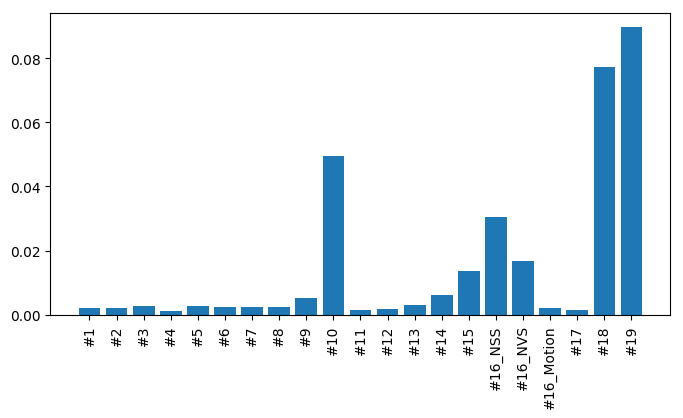

In [7]:
feature_importance = regr.feature_importances_
group_importance=[]
for i in range(21):
    group_importance.append([])
for i in range(feature_importance.shape[0]): 
    #print(i)
    imp=np.sort(feature_importance)[-i]
    arg_imp=np.argsort(feature_importance)[-i]
    group_importance[tags[arg_imp]-1].append(imp)

for i in range(21):
    group_importance[i]=np.max(group_importance[i])

    
my_dpi=100
fig = plt.figure(figsize=(8,4), dpi=my_dpi)
pos = np.arange(21) + .5
plt.bar(pos, group_importance, align='center')
# plt.xticks(pos, tags[sorted_idx])

labels=[]
for idx in (np.arange(21)+1):
    if idx==16:
        labels.append("#16_NSS" )
    elif idx==17:
        labels.append("#16_NVS" )
    elif idx==18:
        labels.append("#16_Motion" )
    elif idx==19:
        labels.append("#17" )
    elif idx==20:
        labels.append("#18" )
    elif idx==21:
        labels.append("#19" )
    else:
        labels.append("#"+str(idx) )

plt.xticks(pos, labels,rotation=90)
# plt.title('Feature Importance (MDI)')
# plt.yscale('log')
    
  
    
fig.savefig('MDI-importance.png', dpi=my_dpi)

### Usefull links

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html